In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import pandas as pd

file_path = "/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/Major/Major_6.wav"
def extract_harmonic_intervals(file_path):
    y, sr = librosa.load(file_path, sr=None)
    # Compute the power spectrum
    spectrum = np.abs(librosa.stft(y))
    # Identify the harmonic peaks
    frequencies = librosa.fft_frequencies(sr=sr, n_fft=2048)
    harmonic_peaks = np.argmax(spectrum, axis=0)
    harmonic_frequencies = frequencies[harmonic_peaks]

    # Compute intervals as differences between consecutive harmonics
    intervals = np.diff(harmonic_frequencies)

    harmonic_intervals_df = pd.DataFrame({
        "Harmonic 1 Frequency (Hz)": harmonic_frequencies[:-1],
        "Harmonic 2 Frequency (Hz)": harmonic_frequencies[1:],
        "Interval (Hz)": intervals
    })

    return harmonic_intervals_df

# Example usage
intervals = extract_harmonic_intervals("/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/Major/Major_6.wav")
print(intervals)

     Harmonic 1 Frequency (Hz)  Harmonic 2 Frequency (Hz)  Interval (Hz)
0                   258.398438                 258.398438       0.000000
1                   258.398438                 258.398438       0.000000
2                   258.398438                 258.398438       0.000000
3                   258.398438                 258.398438       0.000000
4                   258.398438                 258.398438       0.000000
..                         ...                        ...            ...
188                 322.998047                 667.529297     344.531250
189                 667.529297                 645.996094     -21.533203
190                 645.996094                 645.996094       0.000000
191                 645.996094                   0.000000    -645.996094
192                   0.000000                   0.000000       0.000000

[193 rows x 3 columns]


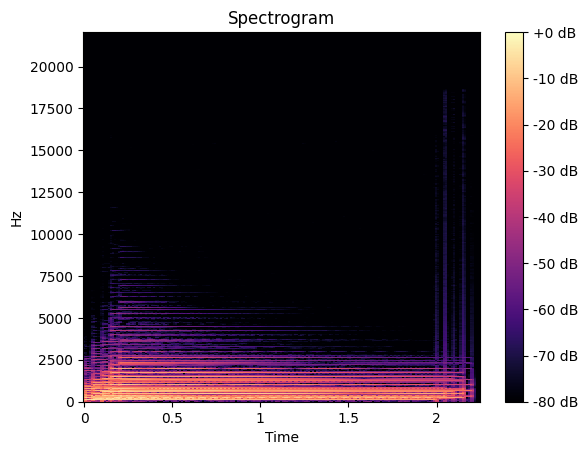

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/Major/Major_6.wav", sr=None)
spectrum = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(spectrum, ref=np.max), sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

Dominant Harmonic Frequencies (Hz):
[262.22222222 330.22222222 392.         495.55555556 524.88888889]


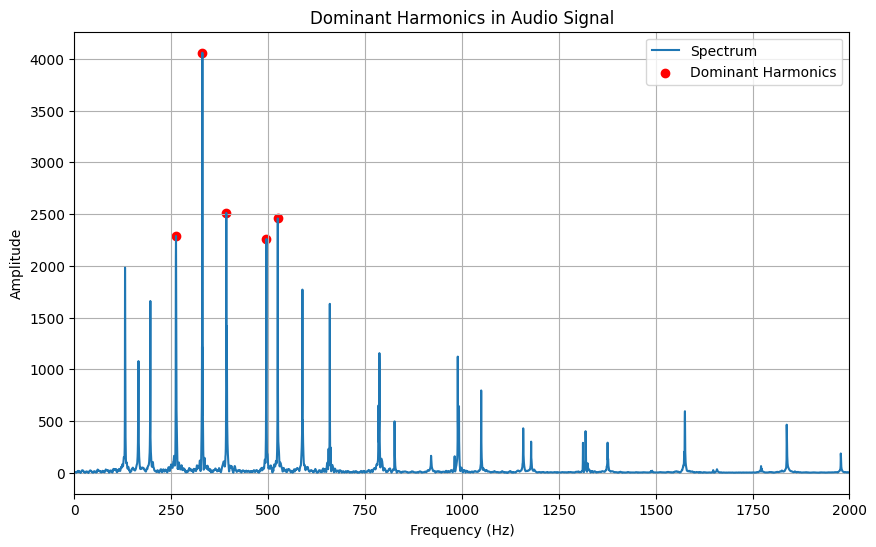

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def get_dominant_harmonics(file_path, num_harmonics=5):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)

    # Compute the Fourier Transform of the entire signal
    spectrum = np.abs(np.fft.rfft(y))  # Half-spectrum for real signals
    frequencies = np.fft.rfftfreq(len(y), 1/sr)  # Corresponding frequencies

    # Find peaks in the spectrum
    peaks, _ = find_peaks(spectrum, height=0.1*np.max(spectrum))  # Peaks above 10% of max

    # Get the most dominant peaks (sorted by amplitude)
    dominant_indices = peaks[np.argsort(spectrum[peaks])[-num_harmonics:]]
    dominant_frequencies = frequencies[dominant_indices]
    dominant_amplitudes = spectrum[dominant_indices]

    # Sort by frequency for easier interpretation
    sorted_indices = np.argsort(dominant_frequencies)
    dominant_frequencies = dominant_frequencies[sorted_indices]
    dominant_amplitudes = dominant_amplitudes[sorted_indices]

    # Create a dictionary for results
    harmonics = {
        "Frequency (Hz)": dominant_frequencies,
        "Amplitude": dominant_amplitudes
    }

    return harmonics

# Example usage
file_path = "/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/Major/Major_0.wav"
harmonics = get_dominant_harmonics(file_path)

# Display results
import pandas as pd
harmonics_df = pd.DataFrame(harmonics)
print("Dominant Harmonic Frequencies (Hz):")
print(harmonics_df["Frequency (Hz)"].values)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Dominant Harmonics", dataframe=harmonics_df)

# Plot the spectrum and peaks
plt.figure(figsize=(10, 6))
y, sr = librosa.load(file_path, sr=None)
spectrum = np.abs(np.fft.rfft(y))
frequencies = np.fft.rfftfreq(len(y), 1/sr)

plt.plot(frequencies, spectrum, label="Spectrum")
plt.scatter(harmonics["Frequency (Hz)"], harmonics["Amplitude"], color='red', label="Dominant Harmonics")
plt.title("Dominant Harmonics in Audio Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 2000)
plt.legend()
plt.grid()
plt.show()


In [ ]:
import os
import pandas as pd
import librosa
import numpy as np
from scipy.signal import find_peaks

#Function to calculate dominant harmonics and intervals
def calculate_harmonic_intervals(file_path, num_harmonics=8):
    y, sr = librosa.load(file_path)
    fft_spectrum = np.abs(np.fft.rfft(y))
    freqs = np.fft.rfftfreq(len(y), 1 / sr)

    # Find dominant peaks
    peaks, _ = find_peaks(fft_spectrum, height=0.1 * max(fft_spectrum))
    sorted_indices = np.argsort(fft_spectrum[peaks])[::-1]
    dominant_peaks = peaks[sorted_indices[:num_harmonics]]
    dominant_freqs = freqs[dominant_peaks]

    # Sort harmonics in ascending order
    dominant_freqs = np.sort(dominant_freqs)

    # Calculate harmonic intervals
    intervals = [dominant_freqs[i] / dominant_freqs[i - 1] for i in range(1, len(dominant_freqs))]

    # Return DataFrame for one file
    return {
        "File Name": os.path.basename(file_path),
        "Harmonic Intervals": intervals
    }

# Function to calculate PCP
# def calculate_pcp(file_path):
#     y, sr = librosa.load(file_path)
#     chroma = librosa.feature.chroma_stft(y=y, sr=sr)
#     avg_chroma = chroma.mean(axis=1)  # Average over time
#     return avg_chroma


# Function to process all files in a directory
directory = "/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/"
def process_audio_files(directory, num_harmonics=8):
    data = []

    # Loop through all audio files in the director
    for dirname, _, filenames in os.walk(directory):
      print(f"Checking directory: {dirname}")
      for file_name in filenames:
        if file_name.endswith(".wav"):
          print(f"Processing file: {file_name}")
          file_path = os.path.join(dirname, file_name)
          chord_type = os.path.basename(dirname)
          try:
            harmonic_data = calculate_harmonic_intervals(file_path, num_harmonics)
            intervals = harmonic_data["Harmonic Intervals"]
            # pcp = calculate_pcp(file_path)
            row = {"File Name": harmonic_data["File Name"], "Chord Type": chord_type}
            for i in range(len(intervals)):
              row[f"Interval {i+1}"] = intervals[i]
            # for i, value in enumerate(pcp):
            #   row[f"PCP {i+1}"] = value

            data.append(row)

          except Exception as e:
              print(f"Error processing {file_name}: {e}")

    # Convert results to a DataFrame
    df = pd.DataFrame(data)
    return df

# Set your directory containing audio files
audio_directory = "/content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/"

# Process audio files and generate a DataFrame
df_harmonic_intervals = process_audio_files(audio_directory, num_harmonics=8)


Checking directory: /content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/
Checking directory: /content/drive/My Drive/Colab Notebooks/Project_601/Audio_Files/Major
Processing file: Major_0.wav
Processing file: Major_100.wav
Processing file: Major_101.wav
Processing file: Major_102.wav
Processing file: Major_103.wav
Processing file: Major_104.wav
Processing file: Major_105.wav
Processing file: Major_106.wav
Processing file: Major_107.wav
Processing file: Major_108.wav
Processing file: Major_109.wav
Processing file: Major_10.wav
Processing file: Major_110.wav
Processing file: Major_111.wav
Processing file: Major_112.wav
Processing file: Major_113.wav
Processing file: Major_114.wav
Processing file: Major_115.wav
Processing file: Major_116.wav
Processing file: Major_117.wav
Processing file: Major_118.wav
Processing file: Major_119.wav
Processing file: Major_11.wav
Processing file: Major_120.wav
Processing file: Major_121.wav
Processing file: Major_122.wav
Processing file: Major_

In [ ]:
df_harmonic_intervals["Chord Type"] = df_harmonic_intervals["Chord Type"].replace("Major", 1)
df_harmonic_intervals["Chord Type"] = df_harmonic_intervals["Chord Type"].replace("Minor", 0)
# Creating DataFrame
df_harmonic_intervals

<ipython-input-6-4c703f0957f2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_harmonic_intervals["Chord Type"] = df_harmonic_intervals["Chord Type"].replace("Minor", 0)


,File Name,Chord Type,Interval 1,Interval 2,Interval 3,Interval 4,Interval 5,Interval 6,Interval 7
0,Major_0.wav,1,1.500000,1.337868,1.259322,1.187079,1.264172,1.059193,1.121084
1,Major_100.wav,1,1.419954,1.119281,1.259854,1.190035,1.191821,1.057190,1.419629
2,Major_101.wav,1,1.262391,1.413395,1.119281,1.125547,1.120623,1.416667,1.001634
3,Major_102.wav,1,1.419501,1.118211,1.260000,1.190476,1.059048,1.125899,1.057508
4,Major_103.wav,1,1.259259,1.416290,1.118211,1.125714,1.411168,1.001799,1.123878
...,...,...,...,...,...,...,...,...,...
854,Minor_96.wav,0,1.500000,1.996491,1.186292,1.336296,1.123060,1.262586,1.057858
855,Minor_97.wav,0,2.366492,1.256637,1.126761,1.410937,1.050941,1.199157,1.123902
856,Minor_98.wav,0,1.414835,1.411650,1.185695,1.194896,1.058252,1.330275,1.188966
857,Minor_99.wav,0,1.413223,1.419103,1.186813,1.262731,1.333639,1.188316,NaN


In [ ]:
print(df_harmonic_intervals[df_harmonic_intervals.isnull().any(axis=1)])

         File Name  Chord Type  Interval 1  Interval 2  Interval 3  \
50   Major_145.wav           1    1.124378    1.334071    1.336650   
66    Major_15.wav           1    1.334755    1.258786    1.189086   
88    Major_17.wav           1    1.334755    1.258786    1.189086   
109  Major_199.wav           1    1.331361    1.004444    1.188053   
139  Major_225.wav           1    1.504202    1.335196    1.261506   
143  Major_229.wav           1    1.259825    1.336222    1.188067   
155   Major_23.wav           1    1.185501    1.417266    1.189086   
177   Major_25.wav           1    1.417279    1.120623    1.259259   
201  Major_281.wav           1    1.335821    1.258845    1.192308   
230  Major_307.wav           1    1.586103    1.259048    1.192133   
272  Major_345.wav           1    1.334842    1.261017    1.186828   
283  Major_355.wav           1    1.334842    1.261017    1.186828   
290  Major_361.wav           1    1.334755    1.258786    1.189086   
292  Major_363.wav  

In [ ]:
df_harmonic_intervals.fillna(0, inplace=True)
#df_harmonic_intervals.dropna(inplace=True)

In [ ]:
!pip install scikit-learn  # Install scikit-learn if you haven't already
from sklearn.model_selection import train_test_split # Import the necessary function


In [ ]:
#columns = ["Interval 1", "Interval 2", "Interval 3", "Interval 4", "Interval 5", "Interval 6"]
columns = ["Interval 1", "Interval 2", "Interval 3"]
train_X, val_X, train_y, val_y = train_test_split(df_harmonic_intervals[columns], df_harmonic_intervals["Chord Type"], test_size=0.30, random_state=0, stratify=df_harmonic_intervals["Chord Type"])
# train_X = train_X.drop_duplicates()
# val_X = val_X.drop_duplicates()

train_X.head()

,Interval 1,Interval 2,Interval 3
556,1.413395,1.259804,1.120623
558,2.000000,1.186636,1.188350
336,1.419954,1.119281,1.259854
117,1.337278,1.256637,1.419014
807,1.191950,1.498701,1.119584


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
svc = SVC(random_state=0)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

score_lr = cross_val_score(lr, train_X, train_y, cv=10).mean()
score_knn = cross_val_score(knn, train_X, train_y, cv=10).mean()
score_svc = cross_val_score(svc, train_X, train_y, cv=10).mean()
score_gnb = cross_val_score(gnb, train_X, train_y, cv=10).mean()
score_dtc = cross_val_score(dtc, train_X, train_y, cv=10).mean()
score_rfc = cross_val_score(rfc, train_X, train_y, cv=10).mean()

In [ ]:
print("Cross Val Score for Logistic Regression: {:.2f}".format(score_lr))
print("Cross Val Score for KNeighbors Classifier: {:.2f}".format(score_knn))
print("Cross Val Score for SVC: {:.2f}".format(score_svc))
print("Cross Val Score for Gaussian NB: {:.2f}".format(score_gnb))
print("Cross Val Score for Decision Tree Classifier: {:.2f}".format(score_dtc))
print("Cross Val Score for Random Forest Classifier: {:.2f}".format(score_rfc))

Cross Val Score for Logistic Regression: 0.58
Cross Val Score for KNeighbors Classifier: 0.76
Cross Val Score for SVC: 0.58
Cross Val Score for Gaussian NB: 0.58
Cross Val Score for Decision Tree Classifier: 0.83
Cross Val Score for Random Forest Classifier: 0.85


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.872093023255814
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       107
           1       0.88      0.91      0.89       151

    accuracy                           0.87       258
   macro avg       0.87      0.86      0.87       258
weighted avg       0.87      0.87      0.87       258

KNN Confusion Matrix:
 [[ 88  19]
 [ 14 137]]


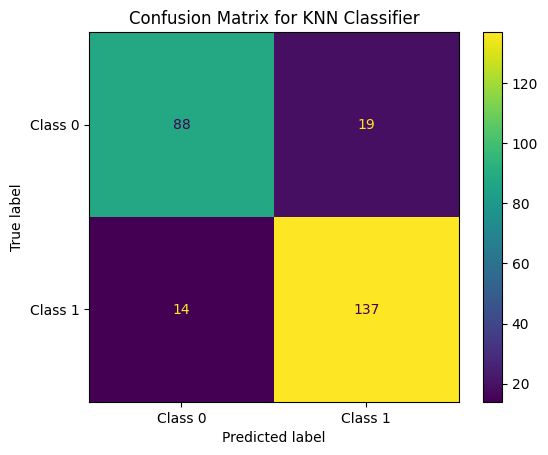

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV for KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy')
grid_knn.fit(train_X, train_y)

# Best parameters and model evaluation
best_knn = grid_knn.best_estimator_
print("Best Parameters for KNN:", grid_knn.best_params_)

# Train and evaluate on the test set
knn_pred = best_knn.predict(val_X)
cm = confusion_matrix(val_y, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

print("KNN Accuracy:", accuracy_score(val_y, knn_pred))
print("KNN Classification Report:\n", classification_report(val_y, knn_pred))
print("KNN Confusion Matrix:\n", cm)

disp.plot()
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Random Forest Accuracy: 0.8798449612403101
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       107
           1       0.88      0.92      0.90       151

    accuracy                           0.88       258
   macro avg       0.88      0.87      0.87       258
weighted avg       0.88      0.88      0.88       258

Random Forest Confusion Matrix:
 [[ 88  19]
 [ 12 139]]


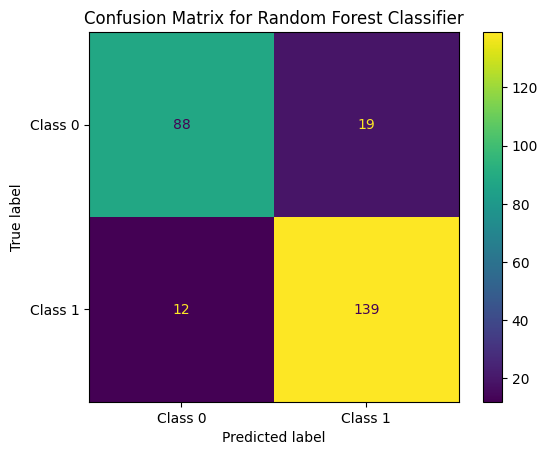

In [ ]:
# Define parameter grid for Random Forest
param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV for Random Forest
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rfc, cv=10, scoring='accuracy')
grid_rfc.fit(train_X, train_y)

# Best parameters and model evaluation
best_rfc = grid_rfc.best_estimator_
print("Best Parameters for Random Forest:", grid_rfc.best_params_)

# Train and evaluate on the test set
rfc_pred = best_rfc.predict(val_X)
cm = confusion_matrix(val_y, rfc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

print("Random Forest Accuracy:", accuracy_score(val_y, rfc_pred))
print("Random Forest Classification Report:\n", classification_report(val_y, rfc_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(val_y, rfc_pred))

disp.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
classifier = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=200)

classifier.fit(train_X, train_y) # training classifier
pred_y = classifier.predict(val_X) # making prediction on validation

Accuracy Score: 0.89


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

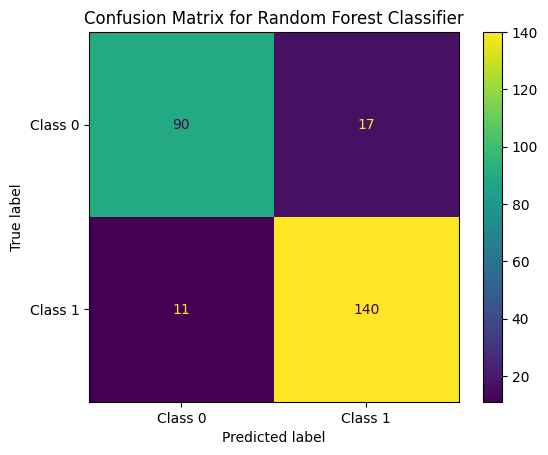

In [ ]:
acc = accuracy_score(val_y, pred_y)
plt.show()
print("Accuracy Score: {:.2f}".format(acc))

cm = confusion_matrix(val_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion Matrix for Random Forest Classifier')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree Accuracy: 0.8604651162790697
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       107
           1       0.87      0.90      0.88       151

    accuracy                           0.86       258
   macro avg       0.86      0.85      0.86       258
weighted avg       0.86      0.86      0.86       258

Decision Tree Confusion Matrix:
 [[ 86  21]
 [ 15 136]]


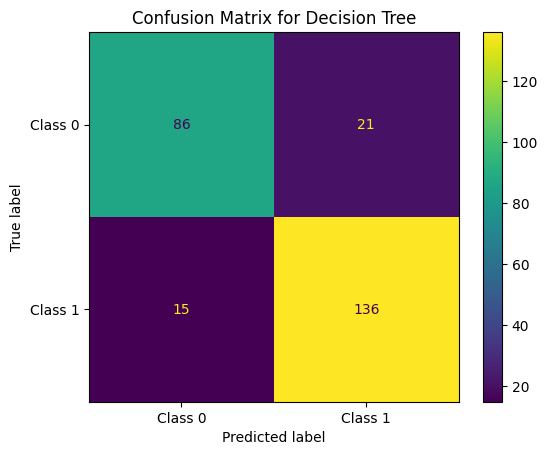

In [ ]:
# Define parameter grid for Decision Tree
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Decision Tree
grid_dtc = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dtc, cv=10, scoring='accuracy')
grid_dtc.fit(train_X, train_y)

# Best parameters and model evaluation
best_dtc = grid_dtc.best_estimator_
print("Best Parameters for Decision Tree:", grid_dtc.best_params_)

# Train and evaluate on the test set
dtc_pred = best_dtc.predict(val_X)
cm = confusion_matrix(val_y, dtc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

print("Decision Tree Accuracy:", accuracy_score(val_y, dtc_pred))
print("Decision Tree Classification Report:\n", classification_report(val_y, dtc_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(val_y, dtc_pred))

disp.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()